Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [37]:
NAME = "Md. Sakib Bin Alam"
ID = "st122574"

---

# Lab 05: Optimization Using Newton's Method

In this lab, we'll explore an alternative to gradient descent
for nonlinear optimization problems: Newton's method.

## Newton's method in one dimension

Consider the problem of finding the *roots* $\textbf{x}$ of a nonlinear function $f: \mathbb{R}^N \rightarrow \mathbb{R}$. A root of $f$ is a point $\mathbf{x}$ that satisfies $f(\mathbf{x}) = 0$.

In one dimension, Newton's method for finding zeroes works as follows:

1. Pick an initial guess $x_0$

2. Let $x_{i+1} = x_i + \frac{f(x_i)}{f'(x_i)}$

3. If not converged, go to #2.

Convergence occurs when $|f(x_i)| < \epsilon_1$ or when $|f(x_{i+1})-f(x_i)| < \epsilon_2$.

Let's see how this works in practice.

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

### Example 1: Root finding for cubic polynomial 

In [39]:
def fx(x, p):
    f_x = np.polyval(p, x)
    return f_x

In [40]:
n = 200
x = np.linspace(-3, 3, n)  

# Create the polynomial f(x) = x^3 + x^2 
p = np.poly1d([1, 1, 0, 0]) # [x^3, x^2, x^1, 1]

# Derivative of a polynomial
# This is a convenient method to obtain p_d = np.poly1d([3, 2, 0])
p_d = np.polyder(p)
print('p derivative:', p_d)
print('p derivative:', p_d[2], p_d[1], p_d[0])

# Get values for f(x) and f'(x) for graphing purposes
y = fx(x, p)
y_d = fx(x,p_d)

p derivative:    2
3 x + 2 x
p derivative: 3 2 0


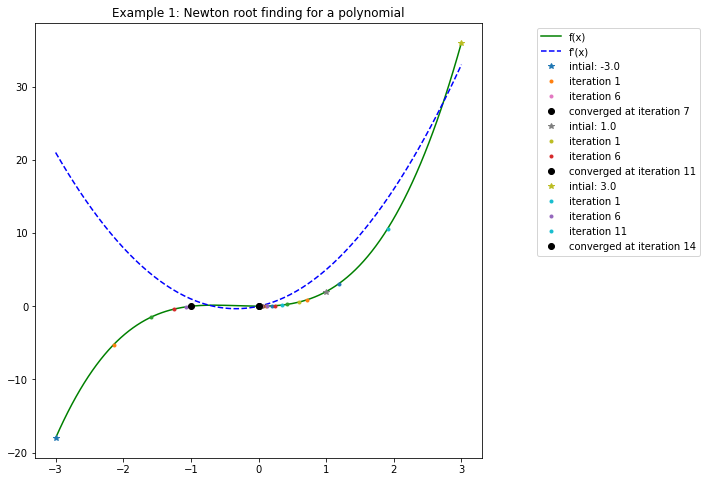

In [41]:
# Try three possible guesses for x0
x0_arr = [-3.0, 1.0, 3.0]
max_iter = 30
threshold = 0.001
roots = []

fig1 = plt.figure(figsize=(8,8)) 
ax = plt.axes()
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label="f\'(x)")

for x0 in x0_arr:
    # Plot initial data point
    plt.plot(x0, fx(x0,p), '*', label='intial: ' + str(x0))    
    i = 0
    while i < max_iter:
        # x1 = x0 - f(x0)/f'(x0)
        x1 = x0 - fx(x0, p) / fx(x0, p_d)
        # Check for delta (x) less than threshold
        if np.abs(x0 - x1) <= threshold:
            roots.append(round(x1,4))
            break;
        # Plot current root after every 5 iterations
        if i % 5 == 0:
            plt.plot(x1, fx(x1, p), '.', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx(x1, p), '.')        
        x0 = x1
        i = i + 1
    plt.plot(x1, fx(x1, p), 'ko', label='converged at iteration '+ str(i+1))

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 1: Newton root finding for a polynomial')

plt.show()

#### Example 2: Root finding for sine function

In [42]:
def fx_sin(x):  
    f_x = np.sin(x)        
    return f_x

def fx_dsin(x):    
    return np.cos(x)

In [43]:
n = 200

x = np.linspace(-np.pi, np.pi, n)  

# Get f(x) and f'(x) for plotting
y = fx_sin(x)
y_d = fx_dsin(x)

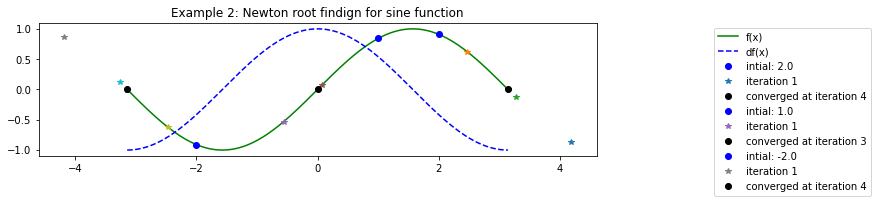

Roots: 3.141593, 0.000000, -3.141593


In [44]:
# Consider three possible starting points
x0_arr = [2.0, 1.0, -2.0]
max_iter = 30
i = 0
threshold = 0.01
roots = []

fig1 = plt.figure(figsize=(10,10)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label='df(x)')

for x0 in x0_arr:
    plt.plot(x0, fx_sin(x0), 'bo', label='intial: ' + str(x0))
    i = 0;
    while i < max_iter:
        x1 = x0 - fx_sin(x0) / fx_dsin(x0)
        if np.abs(x0 - x1) <= threshold:
            roots.append(x1)
            plt.plot(x1,fx_sin(x1),'ko',label='converged at iteration '+ str(i))
            break;
        if i % 5 == 0:
            plt.plot(x1, fx_sin(x1), '*', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx_sin(x1), '*')        
        x0 = x1
        i = i + 1

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 2: Newton root findign for sine function')

plt.show()

print('Roots: %f, %f, %f' % (roots[0], roots[1], roots[2]))


## Newton's method for optimization

Now, consider the problem of minimizing a scalar function $J : \mathbb{R}^n \mapsto \mathbb{R}$.
We would like to find
$$ \theta^* = \text{argmin}_\theta J(\theta) $$
We already know gradient descent:
$$ \theta^{(i+1)} \leftarrow \theta^{(i)} - \alpha \nabla_J(\theta^{(i)}).$$
But Newton's method gives us a potentially faster way to find $\theta^*$ as a zero of
the system of equations
$$\nabla_J(\theta^*) = \mathbf{0}.$$

In one dimension, to find the zero of $f'(x)$, obviously, we would apply Newton's method
to $f'(x)$, obtaining the iteration
$$x_{i+1} = x_i - f'(x_i) / f''(x_i).$$
The multivariate extension of Newton's optimization method is
$$\mathbf{x}_{i+1} = \mathbf{x}_i - \mathtt{H}_f(\mathbf{x}_i) \nabla_f(\mathbf{x}_i),$$
where $\mathtt{H}_f(\mathbf{x})$ is the *Hessian* of $f$ evaluated at $\textbf{x}$:
$$\mathtt{H}_f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 x_n} \\
\frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n x_1} & \frac{\partial^2 f}{\partial x_n x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}$$

This means, for the minimization of $J(\theta)$, we would obtain the update rule
$$\theta^{(i+1)} \leftarrow \theta^{(i)} - \mathtt{H}_J(\theta^{(i)}) \nabla_J(\theta^{(i)}).$$


Note: Here H function would be inverse. Mistake in the above formula.

## Application to logistic regression

Let's create some difficult sample data as follows:

**Class 1:** Two features $x_1$ and $x_2$ jointly distributed as a two-dimensional spherical Gaussian with parameters

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

**Class 2:** Two features $x_1$ and $x_2$ in which the data are generated by first sampling an angle $\theta$ according to a uniform distribution, sampling a distance $d$ according to a one-dimensional Gaussian with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$, then outputting the point $$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$.

Generate 100 samples for each of the classes.

### Exercise 1.1 (5 points)

Generate data for class 1 with 100 samples

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html">numpy.random.multivariate_normal</a> to generate samples.
</details>

In [45]:
mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100

cov_mat = np.diag([sigma_1] * 2)
X1 =  np.random.multivariate_normal(mu_1, cov_mat, 100)

#print(cov_mat)

# YOUR CODE HERE
# raise NotImplementedError()

In [46]:
print(X1[:5])

# Test function: Do not remove
assert X1.shape == (100, 2), 'Size of X1 is incorrect'
assert cov_mat.shape == (2, 2), 'Size of x_test is incorrect'
count = 0 
for i in range(2):
    for j in range(2):
        if i==j and cov_mat[i,j] != 0:
            if cov_mat[i,j] == sigma_1:
                count += 1
        else:
            if cov_mat[i,j] == 0:
                count += 1
assert count == 4, 'cov_mat data is incorrect'

print("success!")
# End Test function

[[2.71660784 1.81125018]
 [0.03639037 1.29650171]
 [1.56625382 1.94188357]
 [0.86098202 2.93185267]
 [2.74313414 1.02494867]]
success!


**Expect result (or looked alike):**\
[[-0.48508229  2.65415886]\
 [ 1.17230227  1.61743589]\
 [-0.61932146  3.53986541]\
 [ 0.70583088  1.45944356]\
 [-0.93561505  0.2042285 ]]

### Exercise 1.2 (5 points)

Generate data for class 2 with 100 samples

$$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$.

with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html">numpy.random.uniform</a> and/or <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html">numpy.random.normal</a> to generate samples.
</details>

In [47]:
# 1. Create sample angle from 0 to 2pi with 100 samples
angle = np.random.uniform(0, 2*np.pi, 100)

# 2. Create sample with normal distribution of d with mean and variance
mean = (3 * sigma_1)**2
std = (0.5 * sigma_1)**2
d =  np.random.normal(mean, std, 100)

# 3 Create X2
X2 = np.zeros((X1.shape))
X2[:,0] = X1[:,0]+d*np.cos(angle)
X2[:,1] =  X1[:,1]+d*np.sin(angle)

# YOUR CODE HERE
#raise NotImplementedError()

In [48]:
print('angle:',angle[:5])
print('d:', d[:5])
print('X2:', X2[:5])

# Test function: Do not remove
assert angle.shape == (100,) or angle.shape == (100,1) or angle.shape == 100, 'Size of angle is incorrect'
assert d.shape == (100,) or d.shape == (100,1) or d.shape == 100, 'Size of d is incorrect'
assert X2.shape == (100,2), 'Size of X2 is incorrect'
assert angle.min() >= 0 and angle.max() <= 2*np.pi, 'angle generate incorrect'
assert d.min() >= 8 and d.max() <= 10, 'd generate incorrect'
assert X2[:,0].min() >= -13 and X2[:,0].max() <= 13, 'X2 generate incorrect'
assert X2[:,1].min() >= -10 and X2[:,1].max() <= 13.5, 'X2 generate incorrect'

print("success!")
# End Test function

angle: [1.44284347 1.23664246 3.16707159 3.00997721 6.13204804]
d: [9.12429026 9.03885771 8.84815743 8.59589266 9.1820693 ]
X2: [[ 3.88090379 10.86095116]
 [ 3.00086416  9.8354035 ]
 [-7.27903176  1.71646629]
 [-7.66056634  4.05994139]
 [11.82053233 -0.3575269 ]]
success!


**Expect result (or looked alike):**\
angle: [4.77258271 3.19733552 0.71226709 2.11244845 6.06280915]\
d: [9.13908279 8.84218552 9.24427852 8.74831667 8.85727588]\
X2: [[ 0.064701   -6.46837219]\
 [-7.65614929  1.12480234]\
 [ 6.37750805  9.58147629]\
 [-3.80438416  8.95550952]\
 [ 7.70745021 -1.73194274]]

### Exercise 1.3 (5 points)

Combine X1 and X2 into single dataset

In [49]:
#print(X1.shape, X2.shape)

# 1. concatenate X1, X2 together
X = np.concatenate((X1, X2), axis = 0)

# 2. Create y with class 1 as 0 and class 2 as 1
y = np.zeros((X.shape[0], 1))
y[0:X1.shape[0]] = 0
y[X1.shape[0]:] = 1

#print(X[:5])

# YOUR CODE HERE
#raise NotImplementedError()

In [50]:
print("shape of X:", X.shape)
print("shape of y:", y.shape)

# Test function: Do not remove
assert X.shape == (200, 2), 'Size of X is incorrect'
assert y.shape == (200,) or y.shape == (200,1) or y.shape == 200, 'Size of y is incorrect'
assert y.min() == 0 and y.max() == 1, 'class type setup is incorrect'

print("success!")
# End Test function

shape of X: (200, 2)
shape of y: (200, 1)
success!


**Expect result (or looked alike):**\
shape of X: (200, 2)\
shape of y: (200, 1)

### Exercise 1.4 (5 points)

Plot the graph between class1 and class2 with **difference color and point style**.

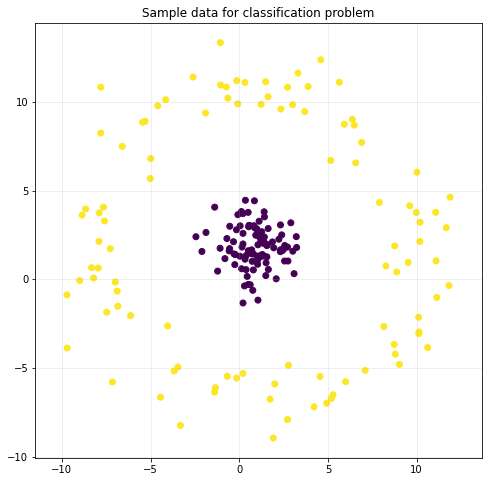

In [51]:
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
# plot graph here

ax.scatter(X[:, 0], X[:, 1], c = y)

# YOUR CODE HERE
#raise NotImplementedError()
# end plot graph
plt.axis('equal')
plt.show()

In [52]:
#np.unique(y)

**Expect result (or looked alike):**

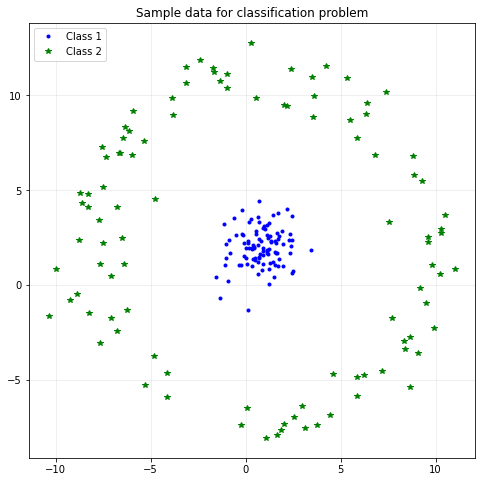

### Exercise 1.5 (5 points)

Split data into training and test datasets with 80% of training set and 20% of test set

In [53]:
train_size = 0.8

idx = np.arange(0,y.shape[0])
np.random.seed(14)   # just make sure the shuffle always the same please do not remove
np.random.shuffle(idx) 
m = X.shape[0]
idx_train = idx[0:round(train_size*len(X))]
idx_test = idx[len(idx_train):]    
X_train = X[idx_train]
y_train = y[idx_train]
X_test = X[idx_test]    
y_test = y[idx_test]


In [54]:
print('idx_train:', idx_train[:10])
print("train size, X:", X_train.shape, ", y:", y_train.shape)
print("test size,  X:", X_test.shape,  ", y:", y_test.shape)

# Test function: Do not remove
assert X_train.shape == (160, 2), 'Size of X_train is incorrect'
assert y_train.shape == (160,) or y_train.shape == (160,1) or y.shape == 160, 'Size of y_train is incorrect'
assert X_test.shape == (40, 2), 'Size of X_test is incorrect'
assert y_test.shape == (40,) or y_test.shape == (40,1) or y.shape == 40, 'Size of y_test is incorrect'

print("success!")
# End Test function

idx_train: [114 189 198 151   5  69  24  15  51 112]
train size, X: (160, 2) , y: (160, 1)
test size,  X: (40, 2) , y: (40, 1)
success!


**Expect reult (Or looked alike):**\
idx_train: [ 78  61  28 166  80 143   6  76  98 133]\
train size, X: (160, 2) , y: (160, 1) \
test size,  X: (40, 2) , y: (40, 1)

### Exercise 1.6 (5 points)

Write the function which normalize X set

#### Practice yourself (No grade, but has extra score 3 points)

Try to use Jupyter notebook to write the normalize equation.

YOUR ANSWER HERE

In [55]:
def normalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    
    X_norm = (X - means) / stds
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return X_norm

In [56]:
XX = normalization(X)

X_train_norm = XX[idx_train]
X_test_norm = XX[idx_test]

# Add 1 at the first column of training dataset (for bias) and use it when training
X_design_train = np.insert(X_train_norm,0,1,axis=1)
X_design_test = np.insert(X_test_norm,0,1,axis=1)

m,n = X_design_train.shape

print(X_train_norm.shape)
print(X_design_train.shape)
print(X_test_norm.shape)
print(X_design_test.shape)

# Test function: Do not remove
assert XX[:,0].min() >= -2.5 and XX[:,0].max() <= 2.5, 'Does the XX is normalized?'
assert XX[:,1].min() >= -2.5 and XX[:,1].max() <= 2.5, 'Does the XX is normalized?'

print("success!")
# End Test function

(160, 2)
(160, 3)
(40, 2)
(40, 3)
success!


### Exercise 1.7 (10 points)

define class for logistic regression: batch gradient descent

The class includes:

 - **Sigmoid** function $$sigmoid(z) = \frac{1}{1+e^{-z}}$$
 - **Softmax** function $$softmax(z) = \frac{e^{z_i}}{\sum_n{e^z}}$$
 - **Hyperthesis (h)** function $$\hat{y} = h(X;\theta) = softmax(\theta . X)$$
 - **Gradient (Negative likelihood)** function $$gradient = - X . \frac{y-\hat{y}}{n}$$
 - **Cost** function $$cost = \frac{\sum{((-y\log{\hat{y}}) - ((1-y)\log{(1 - \hat{y})})})}{n}$$
 - **Gradient ascent** function
 - **Prediction** function
 - **Get accuracy** funciton

In [57]:
class Logistic_BGD:
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = 1 / (1 + np.exp(-z))
        # YOUR CODE HERE
        #raise NotImplementedError()
        return s

    def softmax(self, z):
        sm = np.exp(z) / np.sum(np.exp(z))
        # YOUR CODE HERE
        #raise NotImplementedError()
        return sm
    
    def h(self,X, theta):
        hf = self.sigmoid (X @ theta)
        # YOUR CODE HERE
        #raise NotImplementedError()
        return hf
    
    def gradient(self, X, y, y_pred):
        m = len(y)
        grad = 1/m * np.dot(X.T,(y_pred - y))
        # YOUR CODE HERE
        #raise NotImplementedError()
        return grad
        
    def costFunc(self, theta, X, y):
        m = len(y)    
        y_pred = self.h(X, theta)
        error = (y * np.log(y_pred)) + ((1-y)*np.log(1-y_pred))
        cost = -1/m * sum(error)    
        grad = self.gradient(X, y, y_pred)    
        return cost, grad
    
    def gradientAscent(self, X, y, theta, alpha, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            # 1. calculate cost, grad function
            cost, grad = self.costFunc(theta, X, y)
            theta = theta - alpha * grad
            # 2. update new theta
            #theta = None
            # YOUR CODE HERE
            #raise NotImplementedError()
            
            
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:",J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        # 1. take y_predict from hyperthesis function
        # 2. classify y_predict that what it should be class1 or class2
        # 3. append the output from prediction
        # YOUR CODE HERE
        #raise NotImplementedError()
        y_pred = self.h(X, theta)
        
        for i in range (len(y_pred)):
            y[i] = np.round(y_pred[i])
            
            if y[i] >= 0.5:
                labels.append(1)
            else:
                labels.append(0)
            
        
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        
        # YOUR CODE HERE
        y_pred = self.h(X, theta)
        y_pred = (np.round(y_pred)).astype(int)
        
        correct = 0
        for i in range(0,len(y_pred)):
            if y[i] == y_pred[i]:
                correct += 1
        percent_correct = float(correct)/len(y_pred)*100
        #raise NotImplementedError()
        return percent_correct

In [58]:
# Test function: Do not remove
lbgd = Logistic_BGD()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
out_x1 = lbgd.softmax(out_x1)
out_x2 = lbgd.softmax(out_x2)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.gradientAscent(test_x, test_y, test_t, 0.001, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.29708373, 0.19781153]], 5)), "gradientAscent function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.86896665, 5), "gradientAscent function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_c [0.87192491]
Minimum at iteration: 2
test_t_out [[0.29708373 0.19781153]]
test_j [array([0.87192491]), array([0.87044176]), array([0.86896665])]
test_l [1 1 1 1 1 1]
test_a 50.0
success!


**Expect result:**\
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_c [0.87192491]\
Minimum at iteration: 2\
test_t_out [[0.29708373 0.19781153]]\
test_j [array([0.87192491]), array([0.87044176]), array([0.86896665])]\
test_l [1 1 1 1 1 1]\
test_a 50.0

### Exercise 1.8 (5 points)

Training the data using Logistic_BGD class.
 - Input: X_design_train
 - Output: y_train
 - Use 50,000 iterations
 
Find the initial_theta yourself

In [59]:
alpha = 0.001
iterations = 50000

BGD_model = Logistic_BGD()
initial_theta = np.zeros((X_train.shape[1]+1, 1))
bgd_theta, bgd_cost = BGD_model.gradientAscent(X_design_train, y_train, initial_theta, alpha, iterations)

# YOUR CODE HERE
#raise NotImplementedError()

Minimum at iteration: 49998


[[0.00199348]
 [0.08736779]
 [0.0778615 ]]
50000
[0.69314718]


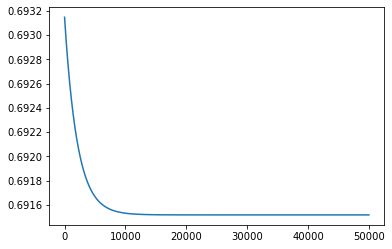

success!


In [60]:
print(bgd_theta)
print(len(bgd_cost))

print(bgd_cost[0])
plt.plot(bgd_cost)
plt.show()

# Test function: Do not remove
assert bgd_theta.shape == (X_train.shape[1] + 1,1) or bgd_theta.shape == (X_train.shape[1] + 1,) or bgd_theta.shape == X_train.shape[1] + 1, "theta shape is incorrect"
assert len(bgd_cost) == iterations, "cost data size is incorrect"

print("success!")
# End Test function

**Expect result (or look alike):**\
[[-0.07328673]\
 [-0.13632896]\
 [ 0.05430939]]\
50000

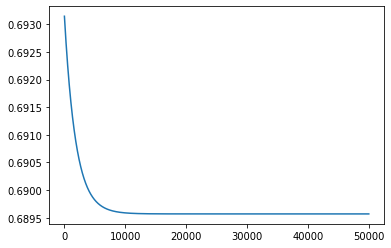

## In lab exercises

1. Verify that the gradient descent solution is correct. Plot the optimal decision boundary you obtain.

2. Write a new class that uses Newton's method for the optmization rather than simple gradient descent.

3. Verify that you obtain a similar solution with Newton's method. Plot the optimal decision boundary you obtain.

4. Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues
   with Newton's method such as a singular or nearly singular Hessian matrix?


### Exercise 1.9 (5 points)

Plot the optimal decision boundary of gradient ascent

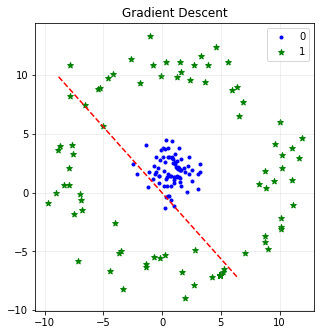

In [61]:
# YOUR CODE HERE
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

fig1 = plt.figure(figsize=(5,10)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Gradient Descent')
plt.grid(axis='both', alpha=.25)

idx_0 = np.where(y_train == 0)
idx_1 = np.where(y_train == 1)

ax.scatter (X_train[idx_0,0], X_train[idx_0, 1], c='b',marker='.',label='0')
ax.scatter (X_train[idx_1,0], X_train[idx_1, 1], c='g',marker='*',label='1')
#ax.scatter(X[:,0][idx_0], X[:,1][idx_0], s=50, c='r', marker='*', label='Not Admitted')
#ax.scatter(X[:,0][idx_1], X[:,1][idx_1], s=50, c='b', marker='o', label='Admitted')
point_1, point_2 = boundary_points(X_train, bgd_theta)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'r--')
plt.legend(loc=0)
plt.show()
##raise NotImplementedError()

**Expect result (or look alike):**\
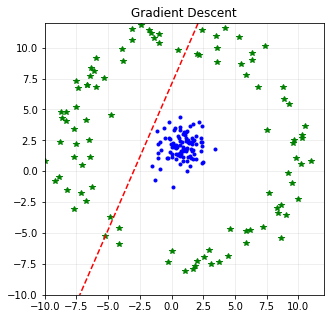

In [62]:
print("Accuracy =",BGD_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 47.5


### Exercise 2.1 (10 points)

Write Newton's method class

In [66]:
class Logistic_NM: #logistic regression for newton's method
      
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = 1 / (1 + np.exp( -z ))
        # YOUR CODE HERE
        #raise NotImplementedError()
        return s

    def h(self,X, theta):
        hf = self.sigmoid (X @ theta)
        # YOUR CODE HERE
        #raise NotImplementedError()
        return hf

    def gradient(self, X, y, y_pred):
        m = len(y)
        grad = 1/m * np.dot(X.T,(y_pred - y))
        return grad
        
    def hessian(self, X, y, theta):
        y_pred = self.h(X,theta)
        S= np.diag(np.dot(y_pred.T,(1 - y_pred)))/len(y)
        hess_mat = np.dot(X.T,X) * S
        return hess_mat
        
    def costFunc(self, theta, X, y):   
        cost, grad = None, None
        m = len(y)    
        y_pred = self.h(X, theta)
        error = (y * np.log(y_pred)) + ((1-y)*np.log(1-y_pred))
        cost = -1/m * sum(error)    
        grad = self.gradient(X, y, y_pred)    
        return cost, grad
    
    def newtonsMethod(self, X, y, theta, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            # YOUR CODE HERE
            #raise NotImplementedError()
            hessian_mat = self.hessian(X,y, theta)
            cost, grad = self.costFunc(theta, X,y)
            theta = theta - np.linalg.inv(hessian_mat) @ grad
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:", J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        y_pred = self.h(X,theta)
#         2. classify y_predict that what it should be class1 or class2
        for i in range(len(y_pred)):
            y[i] = np.round(y_pred[i])
            if (y[i] > 0.5):
                labels.append(1)
            else:
                labels.append(0)
        
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        y_pred = self.h(X, theta)
        y_pred = (np.round(y_pred)).astype(int)
        
        correct = 0
        for i in range(0,len(y_pred)):
            if y[i] == y_pred[i]:
                correct += 1
        percent_correct = float(correct)/len(y_pred)*100
        #raise NotImplementedError()
        return percent_correct

In [67]:
# Test function: Do not remove
lbgd = Logistic_NM()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_h = lbgd.hessian(test_x, test_y, test_t)
print('test_h', test_h)
assert test_h.shape == (2, 2), "hessian matrix function is incorrect"
assert np.array_equal(np.round(test_h.T, 5), np.round([[12.17334371, 6.55487738],[ 6.55487738, 14.84880387]], 5)), "hessian matrix function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.newtonsMethod(test_x, test_y, test_t, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.14765747, 0.15607017]], 5)), "newtonsMethod function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.7534506190845247, 5), "newtonsMethod function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_h [[12.17334371  6.55487738]
 [ 6.55487738 14.84880387]]
test_c [0.87192491]
Minimum at iteration: 2
test_t_out [[0.14765747 0.15607017]]
test_j [array([0.87192491]), array([0.79674844]), array([0.75345062])]
test_l [1 1 1 1 1 1]
test_a 50.0
success!


**Expect result:**
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_h [[12.17334371  6.55487738]\
 [ 6.55487738 14.84880387]]\
test_c 0.8719249134773479\
Minimum at iteration: 2\
test_t_out [[0.14765747 0.15607017]]\
test_j [0.8719249134773479, 0.7967484437157274, 0.7534506190845247]\
test_l [1 1 1 1 1 1]\
test_a 50.0

Minimum at iteration: 999
theta: [[0.00198973]
 [0.08719706]
 [0.07770937]]
[0.69314718]


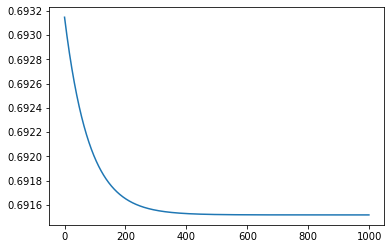

In [68]:
NM_model = Logistic_NM()

iterations = 1000

nm_theta, nm_cost = NM_model.newtonsMethod(X_design_train, y_train, initial_theta, iterations)
print("theta:",nm_theta)

print(nm_cost[0])
plt.plot(nm_cost)
plt.show()

**Expect result (or look alike):**\
Minimum at iteration: 999\
theta: [[-0.07313861]\
 [-0.13605172]\
 [ 0.05419746]]\
0.6931471805599453

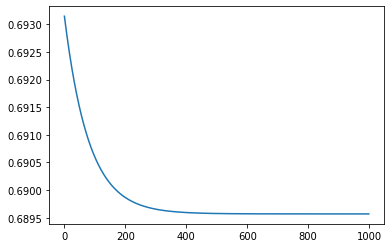

### Exercise 2.2 (5 points)

Plot the optimal decision boundary of Newton method

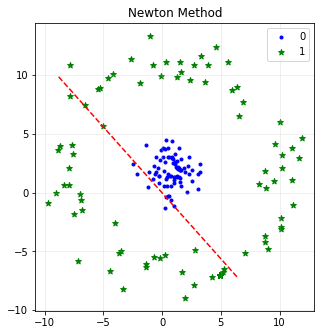

In [69]:
# YOUR CODE HERE
#raise NotImplementedError()
fig1 = plt.figure(figsize=(5,10)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Newton Method')
plt.grid(axis='both', alpha=.25)

idx_0 = np.where(y_train == 0)
idx_1 = np.where(y_train == 1)

ax.scatter (X_train[idx_0,0], X_train[idx_0, 1], c='b',marker='.',label='0')
ax.scatter (X_train[idx_1,0], X_train[idx_1, 1], c='g',marker='*',label='1')
#ax.scatter(X[:,0][idx_0], X[:,1][idx_0], s=50, c='r', marker='*', label='Not Admitted')
#ax.scatter(X[:,0][idx_1], X[:,1][idx_1], s=50, c='b', marker='o', label='Admitted')
point_1, point_2 = boundary_points(X_train, nm_theta)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'r--')
plt.legend(loc=0)
plt.show()

**Expect result (or look alike):**

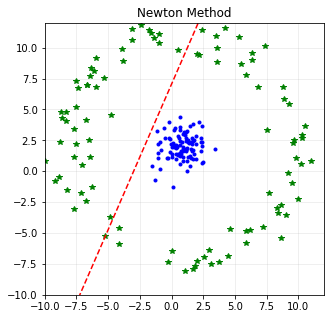

In [70]:
print("Accuracy =",NM_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 47.5


### Exercise 2.3 (5 points)

Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues with Newton's method such as a singular or nearly singular Hessian matrix?

Answer: Cost convergence for Newton's Method is acheived at around 400 iterations. For Gradient Descent it is around 10,000. Singular Hessian Matrix will give error while computing the theta in Newton's method.

## Take-home exercises

1. Perform a *polar transformation* on the data above to obtain a linearly separable dataset. (5 points)

2. Verify that you obtain good classification accuracy for logistic regression with GD or Netwon's method
   after the polar transformation (10 points)
   
3. Apply Newton's method to the dataset you used for the take home exercises in Lab 03. (20 points)




In [72]:
# Convert X to angle and radius
df = pd.DataFrame(X, columns=['X0', 'X1'])
df['angles'] = np.arctan(df.X1 / df.X0)
df['radius'] = np.sqrt(df.X0 ** 2 + df.X1 ** 2)
df['y'] = y

polarX = df[['angles', 'radius']].values
polarX = np.insert(polarX, 0, 1, axis=1)
X_train = polarX[idx_train]
X_test = polarX[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

Text(0, 0.5, 'radius')

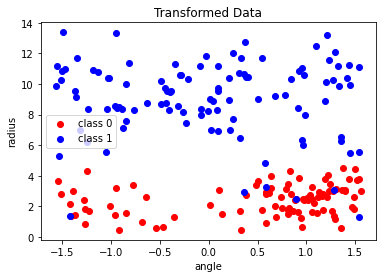

In [73]:
y0_df = df[df.y == 0]
y1_df = df[df.y == 1]

plt.title('Transformed Data')
plt.scatter(y0_df.angles, y0_df.radius, c='r', label='class 0')
plt.scatter(y1_df.angles, y1_df.radius, c='b', label='class 1')
plt.legend()
plt.xlabel('angle')
plt.ylabel('radius')

In [74]:
alpha = 0.001
iterations = 5000

BGD_model = Logistic_BGD()
initial_theta = np.zeros((X_train.shape[1], 1))
bgd_theta, bgd_cost = BGD_model.gradientAscent(X_train, y_train, initial_theta, alpha, iterations) # this is polar X_train, y_train

Minimum at iteration: 4999


In [75]:
NM_model = Logistic_NM()

iterations = 1000

nm_theta, nm_cost = NM_model.newtonsMethod(X_train, y_train, initial_theta, iterations)

Minimum at iteration: 999


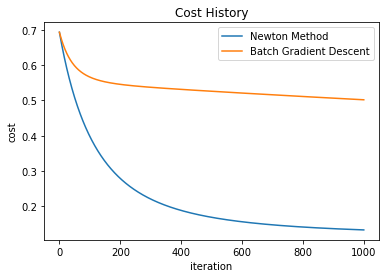

In [77]:
plt.plot(nm_cost, label='Newton Method')
plt.plot(bgd_cost[:iterations], label='Batch Gradient Descent')
plt.title('Cost History')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend()
plt.show()

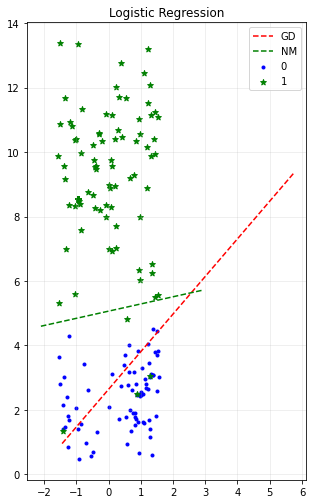

In [79]:
fig1 = plt.figure(figsize=(5,10)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Logistic Regression')
plt.grid(axis='both', alpha=.25)

idx_0 = np.where(y_train == 0)
idx_1 = np.where(y_train == 1)

ax.scatter (X_train[idx_0,1], X_train[idx_0, 2], c='b',marker='.',label='0')
ax.scatter (X_train[idx_1,1], X_train[idx_1, 2], c='g',marker='*',label='1')
#ax.scatter(X[:,0][idx_0], X[:,1][idx_0], s=50, c='r', marker='*', label='Not Admitted')
#ax.scatter(X[:,0][idx_1], X[:,1][idx_1], s=50, c='b', marker='o', label='Admitted')
point_1, point_2 = boundary_points(X_train[:,1:], bgd_theta)
point_3, point_4 = boundary_points(X_train[:,1:], nm_theta)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'r--',label='GD')
plt.plot([point_3[0,0], point_4[0,0]],[point_3[1,0], point_4[1,0]], 'g--',label='NM')
plt.legend(loc=0)
plt.show()

In [81]:
print("Accuracy of GD =",BGD_model.getAccuracy(X_train,y_train,bgd_theta))
print("Accuracy of Newtons method =",NM_model.getAccuracy(X_train,y_train,nm_theta))

Accuracy of GD = 86.25
Accuracy of Newtons method = 97.5


So, we find that after polar transformation in our dataset, we get a very good accuracy for bot GD and Newton's method.

#### Apply Newton's method to the dataset you used for the take home exercises in Lab 03

In [82]:
import pandas as pd
import numpy as np

# Import the data

data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')

# Start to explore the data

print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

Training data shape (614, 13)
Test data shape (367, 12)


In [83]:
# Check for missing values in the training and test data

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [84]:
# Compute ratio of each category value
# Divide the missing values based on ratio
# Fillin the missing values
# Print the values before and after filling the missing values for confirmation

print(data_train['Married'].value_counts())

married = data_train['Married'].value_counts()
print('Elements in Married variable', married.shape)
print('Married ratio ', married[0]/sum(married.values))

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)
# total Married missing values in train set = 3
# ratio of Married ['yes'] is 0.65
# so, 0.65 * 3 = 1.95, that's why in the -> fill_martial_status(data_train, 2, 1), yes_num_train value is 2

print(data_train['Married'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

Yes    398
No     213
Name: Married, dtype: int64
Elements in Married variable (2,)
Married ratio  0.6513911620294599
Yes    400
No     214
Name: Married, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [85]:
print('Missimg Dependents value in train:', data_train['Dependents'].isnull().sum())
print('Missing Dependents value in test:', data_test['Dependents'].isnull().sum())

# Another example of filling in missing values for the "number of dependents" attribute.
# Here we see that categorical values are all numeric except one value "3+" 
# Create a new category value "4" for "3+" and ensure that all the data is numeric

print(data_train['Dependents'].value_counts())
dependent = data_train['Dependents'].value_counts()

print('Dependent ratio 1 ', dependent['0'] / sum(dependent.values))
print('Dependent ratio 2 ', dependent['1'] / sum(dependent.values))
print('Dependent ratio 3 ', dependent['2'] / sum(dependent.values))
print('Dependent ratio 3+ ', dependent['3+'] / sum(dependent.values))

def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

# fille the train and test missing data
# total missing value in train = 15
# ratio of dependent ['0'] is 0.575 .. So, 0.575 * 15 = 9
# ratio of dependent ['1'] is 0.170 .. So, 0.170 * 15 = 2
# ratio of dependent ['2'] is 0.16 .. So, 0.16 * 15 = 2
# ratio of dependent ['3+'] is 0.08 .. So, 0.08 * 15 = 2

# totall missing value in test = 10
# ratio of dependent ['0'] is 0.575 .. So, 0.575 * 10 = 5
# similar like before
    
fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

print(data_train['Dependents'].value_counts())

# Convert category value "3+" to "4"

data_train['Dependents'].replace('3+', 4, inplace = True)
data_test['Dependents'].replace('3+', 4, inplace = True)

Missimg Dependents value in train: 15
Missing Dependents value in test: 10
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Dependent ratio 1  0.5759599332220368
Dependent ratio 2  0.17028380634390652
Dependent ratio 3  0.1686143572621035
Dependent ratio 3+  0.08514190317195326
0     354
1     104
2     103
3+     53
Name: Dependents, dtype: int64


In [86]:
print(data_train['LoanAmount'].value_counts())

LoanAmt = data_train['LoanAmount'].value_counts()

print('mean loan amount ', np.mean(data_train["LoanAmount"]))

loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22) # in training set 22 misssing
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5) # in test set 5 missing

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
mean loan amount  146.41216216216216


In [87]:
print(data_train.isnull().sum())
print()
print(data_test.isnull().sum())

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [88]:
# Gender

print(data_train['Gender'].value_counts())

gender = data_train['Gender'].value_counts()
print('Gender ratio ', gender[0]/sum(gender.values))


def fill_gender_status(data, male_num_train, female_num_train):    
    data['Gender'].fillna('Male',inplace=True, limit = male_num_train )
    data['Gender'].fillna('Female',inplace=True, limit = female_num_train)  

fill_gender_status(data_train,11,2)
print(data_train['Gender'].value_counts()) 
print('Missing values for train data:', data_train.isnull().sum())

Male      489
Female    112
Name: Gender, dtype: int64
Gender ratio  0.8136439267886856
Male      500
Female    114
Name: Gender, dtype: int64
Missing values for train data: Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [89]:
# Self employed

print(data_train['Self_Employed'].value_counts())

self_employed = data_train['Self_Employed'].value_counts()
print('Self Employed ratio ', self_employed[0]/sum(self_employed.values))

def fill_selfemployed_status(data, yes_num_train, no_num_train):        
    data['Self_Employed'].fillna('No', inplace = True, limit = yes_num_train)
    data['Self_Employed'].fillna('Yes', inplace = True, limit = no_num_train)  

fill_selfemployed_status(data_train, 27, 5)
print(data_train['Self_Employed'].value_counts()) 
print('Missing values for train data:', data_train.isnull().sum())

No     500
Yes     82
Name: Self_Employed, dtype: int64
Self Employed ratio  0.8591065292096219
No     527
Yes     87
Name: Self_Employed, dtype: int64
Missing values for train data: Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [90]:
# loan amount term
# this is numeric data, we will fill by mean()
print(data_train['Loan_Amount_Term'].value_counts())

LoanAmt = data_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [91]:
means_LoanAmountTerm = np.mean(data_train['Loan_Amount_Term'])
data_train['Loan_Amount_Term'].fillna(means_LoanAmountTerm, inplace=True, limit = 14)
print('Missing values for train data:', data_train.isnull().sum())

Missing values for train data: Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [92]:
# credit history
credit = data_train['Credit_History'].value_counts()
print('Credit ratio ', credit[0]/sum(credit.values))

def fill_credit_status(data, one_num_train, two_num_train):    
    data['Credit_History'].fillna(1.0,inplace=True, limit = one_num_train )
    data['Credit_History'].fillna(0.0,inplace=True, limit = two_num_train)  

fill_credit_status(data_train,42,8) #Calcuated using the ratio to the total missing values
print(data_train['Credit_History'].value_counts()) 
print('Missing values for train data:', data_train.isnull().sum())

Credit ratio  0.15780141843971632
1.0    517
0.0     97
Name: Credit_History, dtype: int64
Missing values for train data: Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [93]:
# test set

print(data_test['Gender'].value_counts())

gender = data_test['Gender'].value_counts()
print('Gender ratio ', gender[0]/sum(gender.values))


fill_gender_status(data_test,9,2)
print(data_test['Gender'].value_counts()) 
print('Missing values for train data:', data_test.isnull().sum())

Male      286
Female     70
Name: Gender, dtype: int64
Gender ratio  0.8033707865168539
Male      295
Female     72
Name: Gender, dtype: int64
Missing values for train data: Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [94]:
print(data_test['Self_Employed'].value_counts())

self_employed = data_test['Self_Employed'].value_counts()
print('Self-Employed ratio ', self_employed[0]/sum(self_employed.values))

fill_selfemployed_status(data_test, 19, 4)
print(data_test['Self_Employed'].value_counts()) 
print('Missing values for train data:', data_test.isnull().sum())

No     307
Yes     37
Name: Self_Employed, dtype: int64
Self-Employed ratio  0.8924418604651163
No     326
Yes     41
Name: Self_Employed, dtype: int64
Missing values for train data: Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [95]:
print(data_test['Loan_Amount_Term'].value_counts())

means_LoanAmountTerm_test = np.mean(data_test['Loan_Amount_Term'])
data_test['Loan_Amount_Term'].fillna(means_LoanAmountTerm_test, inplace=True, limit = 6)
print('Missing values for train data:', data_test.isnull().sum())

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64
Missing values for train data: Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


In [96]:
print(data_test['Credit_History'].value_counts())

credit = data_test['Credit_History'].value_counts()
print('Credit ratio ', credit[0]/sum(credit.values))

fill_credit_status(data_test,24,5)
print(data_test['Credit_History'].value_counts()) 
print('Missing values for train data:', data_test.isnull().sum())

1.0    279
0.0     59
Name: Credit_History, dtype: int64
Credit ratio  0.17455621301775148
1.0    303
0.0     64
Name: Credit_History, dtype: int64
Missing values for train data: Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


### Convert categorical to numerical

In [97]:
data_train['Gender'].replace('Male', 0, inplace = True)
data_train['Gender'].replace('Female', 1, inplace = True)
data_train['Married'].replace('No', 0, inplace = True)
data_train['Married'].replace('Yes', 1, inplace = True)
data_train['Education'].replace('Not Graduate', 0, inplace = True)
data_train['Education'].replace('Graduate', 1, inplace = True)
data_train['Self_Employed'].replace('No', 0, inplace = True)
data_train['Self_Employed'].replace('Yes', 1, inplace = True)
data_train['Property_Area'].replace('Urban', 0, inplace = True)
data_train['Property_Area'].replace('Semiurban', 1, inplace = True)
data_train['Property_Area'].replace('Rural', 2, inplace = True)
data_train['Loan_Status'].replace('N', 0, inplace = True)
data_train['Loan_Status'].replace('Y', 1, inplace = True)

In [98]:
data_test['Gender'].replace('Male', 0, inplace = True)
data_test['Gender'].replace('Female', 1, inplace = True)
data_test['Married'].replace('No', 0, inplace = True)
data_test['Married'].replace('Yes', 1, inplace = True)
data_test['Education'].replace('Not Graduate', 0, inplace = True)
data_test['Education'].replace('Graduate', 1, inplace = True)
data_test['Self_Employed'].replace('No', 0, inplace = True)
data_test['Self_Employed'].replace('Yes', 1, inplace = True)
data_test['Property_Area'].replace('Urban', 0, inplace = True)
data_test['Property_Area'].replace('Semiurban', 1, inplace = True)
data_test['Property_Area'].replace('Rural', 2, inplace = True)

In [99]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [100]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 34.5+ KB


In [101]:
# convert all to int/float

data_train['Dependents'] = data_train['Dependents'].astype(str).astype(int)
data_train['Loan_Amount_Term'] = data_train['Loan_Amount_Term'].astype(int)
data_train['Credit_History'] = data_train['Credit_History'].astype(int)
data_train['CoapplicantIncome'] = data_train['CoapplicantIncome'].astype(int)
data_train['LoanAmount'] = data_train['LoanAmount'].astype(int)

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    int64 
 2   Married            614 non-null    int64 
 3   Dependents         614 non-null    int64 
 4   Education          614 non-null    int64 
 5   Self_Employed      614 non-null    int64 
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int64 
 8   LoanAmount         614 non-null    int64 
 9   Loan_Amount_Term   614 non-null    int64 
 10  Credit_History     614 non-null    int64 
 11  Property_Area      614 non-null    int64 
 12  Loan_Status        614 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 62.5+ KB


In [102]:
X = np.array(data_train.iloc[:,1:12]) # don't consider Loan id
y = np.array(data_train.iloc[:,-1])

print(X.shape, y.shape)
m,n = X.shape
y = y.reshape(m,1)

(614, 11) (614,)


In [103]:
# normalize the data

X = (X-np.mean(X, axis = 0))/np.std(X, axis = 0)

In [104]:
import random

m, n = X.shape
XX = np.insert(X, 0, 1, axis=1)
idx = np.arange(0, m)
random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:]
X_test = XX[test_idx,:]
y_train = y[train_idx]
y_test = y[test_idx]

In [105]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((368, 12), (368, 1), (246, 12), (246, 1))

Minimum at iteration: 1999
[0.69314718]


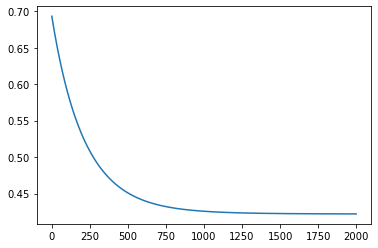

In [106]:
NM_model = Logistic_NM()

iterations = 2000
initial_theta = np.zeros((X_train.shape[1],1))
nm_theta, nm_cost = NM_model.newtonsMethod(X_train, y_train, initial_theta, iterations)

print(nm_cost[0])
plt.plot(nm_cost)
plt.show()

In [107]:
print("Accuracy =",NM_model.getAccuracy(X_test,y_test,nm_theta))

Accuracy = 75.60975609756098


***In lab 3, In order to get the best result alpha value was taken 0.0003 and theta was initialized theta1. We obtained those by 100000 iterations. But by applying Newton's method we see the optimal result at around 2000 iterations.***

## The report

Write a brief report covering your experiments (both in lab and take home) and send as a Jupyter notebook
to the TAs, Manish and Abhishek before the next lab.

In your solution, be sure to follow instructions.

***It is found that Newton's method converges a lot quicker than GD and gives a better accuracy. GD took 10000 but Newton's method took around 400 iterations to converge.***

***Newton's method doesn't need to test different alpha values when training the dataset. In GD we have to keep trying different values of alpha to find the best result.***